In [1]:
import os
os.chdir('../')
from python_code import kernel_smoother
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size':14})
from scipy.stats import multivariate_normal
import pandas as pd
from sklearn.model_selection import train_test_split

## smoothing

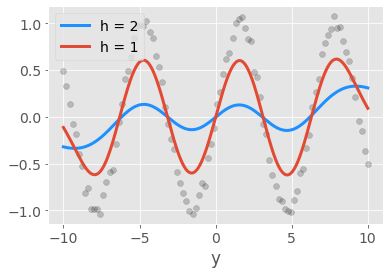

In [2]:
x = np.linspace(-10,10,100).reshape(-1,1)
y = np.sin(x) + np.random.normal(0,.05, size=len(x)).reshape(-1,1)
plt.scatter(x, y, alpha=.2, color='black')
x_smooth = np.linspace(-10,10,1000).reshape(-1,1)
plt.plot(x_smooth, kernel_smoother.KernelSmoother(x, y, bandwidth=2).predict(x_smooth), color='dodgerblue', lw=3, label = 'h = 2')
plt.plot(x_smooth, kernel_smoother.KernelSmoother(x, y, bandwidth=1).predict(x_smooth), lw=3, label = 'h = 1')
plt.legend()
plt.xlabel('x')
plt.xlabel('y');

In [3]:
x = np.linspace(-3,3,100)
xx, yy = np.meshgrid(x, x)
cov = np.eye(2)
mean = np.zeros(2)
vals = multivariate_normal(mean=mean, cov=cov).pdf(np.stack((xx.flatten(), yy.flatten())).T) + np.random.normal(0,.1,size=100*100)



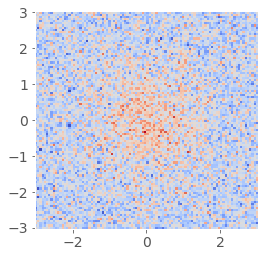

In [4]:
plt.figure(figsize=(4, 4))
plt.pcolormesh(xx, yy, vals.reshape(100,100), cmap='coolwarm',shading='auto');

In [5]:
points = np.stack((xx.flatten(),yy.flatten())).T

In [6]:
val_pred = kernel_smoother.KernelSmoother(points, vals, bandwidth=1).predict(points)

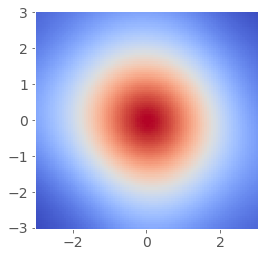

In [7]:
plt.figure(figsize=(4, 4))
plt.pcolormesh(xx, yy, val_pred.reshape(100,100), cmap='coolwarm',shading='auto');

## optimal bandwidth

In [8]:
x = np.linspace(-10,10,200).reshape(-1,1)
y = x**2 + np.random.normal(0,5, size=len(x)).reshape(-1,1)
smoother = kernel_smoother.KernelSmoother(x, y)
smoother.fit(method='basic_validation')
smoother.bandwidth

array([0.38757421])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_plot = np.linspace(-10,10,500).reshape(-1,1)

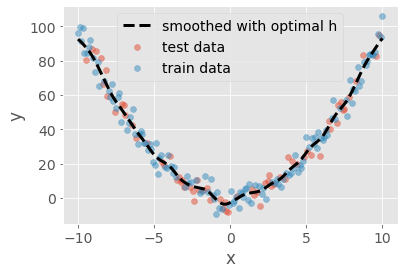

In [10]:
plt.plot(x_plot, smoother.predict(x_plot), color='black', lw=3, linestyle='--', label='smoothed with optimal h')
plt.scatter(x_test, y_test, alpha =.5, label='test data')
plt.scatter(x_train, y_train, alpha =.5, label='train data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

In [61]:
data = {}
best_bandwidths = {}

In [68]:
x = np.linspace(-10,10,500).reshape(-1,1)
data['wiggly_noisy'] = 2*np.sin(5*x) + x + np.random.normal(0,2, size=len(x)).reshape(-1,1)
data['wiggly_smooth'] = 2*np.sin(5*x)+ x + np.random.normal(0,.05, size=len(x)).reshape(-1,1)
data['smooth_noisy'] = np.sin(.1*x) + np.random.normal(0,1, size=len(x)).reshape(-1,1)
data['smooth_smooth'] = np.sin(.1*x) + np.random.normal(0,.05, size=len(x)).reshape(-1,1)

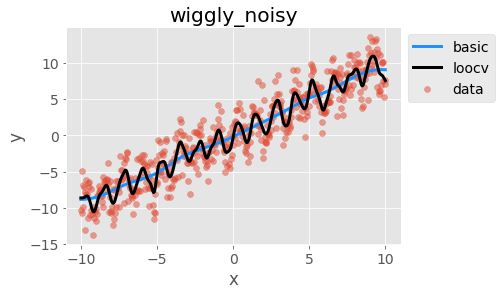

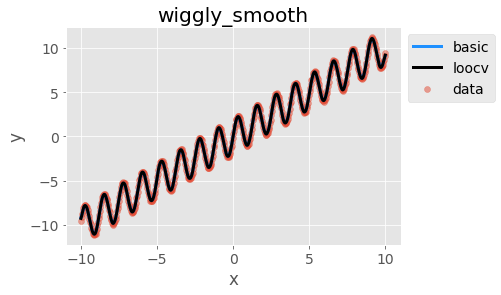

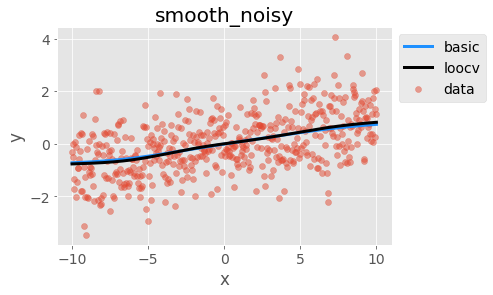

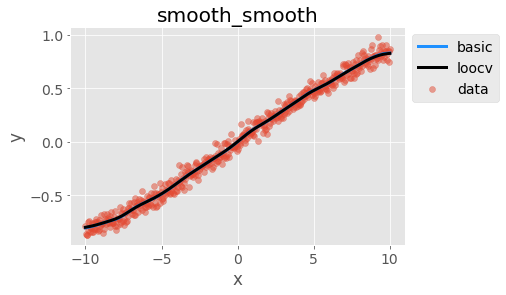

<Figure size 432x288 with 0 Axes>

In [69]:
for key, items in data.items():
    smoother = kernel_smoother.KernelSmoother(x, items, bandwidth=2)
    smoother.fit(method='basic_validation')
    plt.plot(x_plot, smoother.predict(x_plot), color='dodgerblue', lw=3, label='basic')
    smoother = kernel_smoother.KernelSmoother(x, items, bandwidth=2)
    smoother.fit(method='leave_one_out')
    plt.plot(x_plot, smoother.predict(x_plot), color='black', lw=3, label='loocv')
    plt.scatter(x, items, alpha =.5, label='data')
    plt.title(key)
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel('x')
    plt.ylabel('y');
    plt.figure()